- By Renzo Tanaka-Wong
- November 30th, 2020

I aﬀirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 7

## Problem 0

It is highly recommended that you work with your group to fully complete the Discussion assignments on 11/17, 11/19, and 11/24, as these will directly help with your project. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 

**Suggestion**: It is recommended, but not required, that you coordinate with your group members so that each of you explores a different model. It is similarly suggested, but not required, that each of you use different subsets of three columns so that you can each learn something about different parts of the data. You are encouraged to help each other out on all parts of this problem. 

#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. If you demonstrate multinomial logistic regression for this problem, you should also demonstrate cross-validation to select a small feature set. That is, you should (a) skip step 2 below and (b) use CV to select a set of three features, including one qualitative feature and two quantitative ones. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. You may also choose a different set of three columns than the ones used in that Discussion activity. In particular, you should: 

1. **Load** the data. 
2. **Select no more than three predictor columns** of the data and the `Species` target column, discarding the others. Choose one qualitative predictor column (e.g. `Island`, `Sex`) and two quantitative predictor columns. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Use cross-validation** to estimate an optimal complexity parameter for your model. 
5. Having selected an optimal complexity parameter, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix -- [check Monday's lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) for an example. 
7. **Plot the [decision regions](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/live-lecture-22.ipynb)** for your model. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 

Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Specifications

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. **Treat this problem as 50% coding assignment and 50% clearly-written lab report.**

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

## Your Solution

# Support Vector Classifier on the Palmer Penguins data set

The objective of the following code is to use a machine learning model, specifically a support vector classifier, to predict the species of a penguin based on some of its features. For the purpose of this model, we will be specifying the exact features (dataframe columns) that we will use for our model, rather than to implement automatic feature selction.

### I. Importing data

In [1]:
import urllib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
# Grab the data and parse it
filedata = urllib.request.urlopen(url) 
# Write to file
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())
penguins = pd.read_csv('penguins.csv')

### II. Preparing the data

First let's inspect the raw penguins dataframe to understand the data we are working with.

In [3]:
# Inspect the data frame
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


The `Species` column names are long and complicated, so for simplicity we will convert the `Species` column to just the name of the species. Furthermore we standardize the `Sex` column to deal with the **NaN** values in the column.

In [4]:
# Simplify 'Species' name to just the species
penguins["Species"] = penguins["Species"].str.split().str.get(0)
# Recode Sex names
recode = {"MALE" : "M","FEMALE" : "F", np.nan : "Unknown", "."  : "Unknown"}
penguins["Sex"] = penguins["Sex"].map(recode)

We are interested in slecting two quantitative features for our model. Let's examine a simple histogram of the quantitiative varaibles and select two features we are interested in working with.

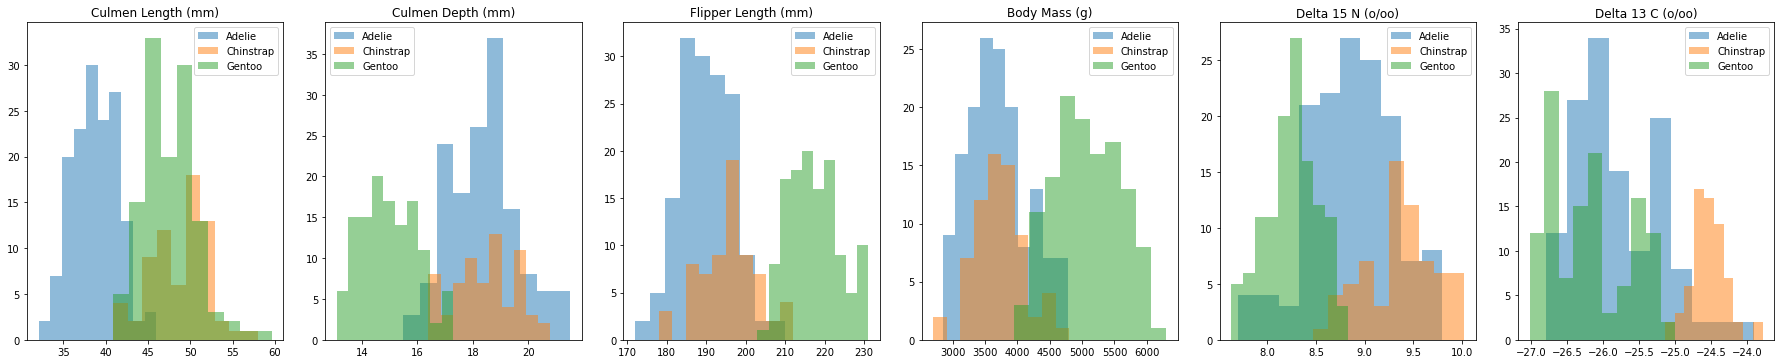

In [5]:
# List containing labels for quantitative variables
quant_cols = ["Culmen Length (mm)", 
        "Culmen Depth (mm)",
        "Flipper Length (mm)",
        "Body Mass (g)",
        "Delta 15 N (o/oo)",
        "Delta 13 C (o/oo)"]

fig, ax = plt.subplots(1, len(quant_cols), figsize =  (25, 5))

def plot_hist(df, colname, index):
    """
    This simple plot function plots histograms based on:
    df = dataframe
    colname = column name of quantitative variable
    index = Index indicating which subplot to plot on
    """
    ax[index].hist(df[colname], alpha = 0.5, label = df["Species"])
    ax[index].set(title = colname)
    ax[index].legend()
    
# Fit plots
fig.tight_layout()

# Iterate over the list of quantitative variables to plot each one
for i in range(len(quant_cols)):
    penguins.groupby("Species").apply(plot_hist, quant_cols[i], i)

Now we select the specific predictors (columns) we want to implement to predict the 'Species' column. For this model we will select two quantitative variables, a penguin's `Culmen Length (mm)` and `Flipper Length (mm)`, and also one qualitative variable, `Sex`. We will also include the `Species` column which is our target variable.

In [6]:
# Select three predictors, one qualitative and two quantitative columns, and the 'Species' target column
cols = ["Species", "Sex", "Culmen Length (mm)", "Flipper Length (mm)"]
penguins = penguins[cols]
penguins

,Species,Sex,Culmen Length (mm),Flipper Length (mm)
0,Adelie,M,39.1,181.0
1,Adelie,F,39.5,186.0
2,Adelie,F,40.3,195.0
3,Adelie,Unknown,NaN,NaN
4,Adelie,F,36.7,193.0
...,...,...,...,...
339,Gentoo,Unknown,NaN,NaN
340,Gentoo,F,46.8,215.0
341,Gentoo,M,50.4,222.0
342,Gentoo,F,45.2,212.0


By inspection, we can see that the dataframe above contains rows with **NaN** values. We want to remove such rows form the dataframe. 

In [7]:
# drop rows containing NaN values 
penguins = penguins.dropna()
penguins

,Species,Sex,Culmen Length (mm),Flipper Length (mm)
0,Adelie,M,39.1,181.0
1,Adelie,F,39.5,186.0
2,Adelie,F,40.3,195.0
4,Adelie,F,36.7,193.0
5,Adelie,M,39.3,190.0
...,...,...,...,...
338,Gentoo,F,47.2,214.0
340,Gentoo,F,46.8,215.0
341,Gentoo,M,50.4,222.0
342,Gentoo,F,45.2,212.0


We will work with the dataframs above to train an SVC model. Before splitting our data into training and testing data for our model, we set a random seed to ensure that the random values the code generates will be the same everytime it is run.

In [8]:
np.random.seed(1000)

Our goal is to build a support vector classifier model which predicts the species of a penguin based on the selected features that we have specified in the penguins dataframe shown above. Now that the data is selected and parsed, we split it into training and testing data at the proportion 80 : 20. We split the data accordingly in order to have a set of the data which will be used to train our SVC model and test data which will be used to determine the accuracy of our model and to deem necessary adjustments to our model's parameters.

In [9]:
from sklearn.model_selection import train_test_split
# Split data into training and testing data
train, test = train_test_split(penguins, test_size = 0.2)

Now that the dataframe is split into training and testing data, we want to further clean and split the data into predictor and target variables of X and y. We will do this through a custom function which will encode the `Sex` column into an enumerated column and then split a dataframe into predictor and target variables, X and y.

In [10]:
from sklearn import preprocessing

def prep_penguins_data(data_df):
    """
    This function prepares the penguins dataframe by encoding the categorical
    'Sex' column to be an enumerated columns of factors. Then the dataframe
    is split into the predictor and target variables of X and y.
    """
    
    df = data_df.copy()
    
    # encode sex names to 0, 1, and 2
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    
    # split data into X and y
    X = df.drop(['Species'], axis = 1)
    y = df['Species']
    
    return(X, y)

Finally, with our function defined we are ready to prepare our training and testing data.

In [11]:
# Prepare training data
X_train, y_train = prep_penguins_data(train)
# Prepare testing data
X_test, y_test = prep_penguins_data(test)

In [12]:
X_train

,Sex,Culmen Length (mm),Flipper Length (mm)
272,0,45.1,210.0
43,1,44.1,196.0
133,1,37.5,199.0
163,1,51.7,194.0
97,1,40.3,196.0
...,...,...,...
258,0,44.0,208.0
252,0,45.1,207.0
193,0,46.2,187.0
72,0,39.6,196.0


### III. Training a model

Using the training data we generated in the previous section, we now train a support vector classifier model (SVC). In bare terms an SVC model finds surfaces or hyperplanes in an n-dimensional space (where n is the number of features or columns) which classifies the data points. The support vector classifier has multiple parameters which can be fine-tuned to improve a model's accuracy, and in particualar, we will focus on *gamma* for which higher values create more complex models. We start by setting the gamma to it's default value *scale* found by 1 / (n_features * var(X)).

In [13]:
from sklearn.svm import SVC
# Train and evaluate an SVC model with gamma set to scale
SVC_Model = SVC(gamma = 'scale')
SVC_Model.fit(X_train, y_train)
SVC_Model.score(X_train, y_train), SVC_Model.score(X_test, y_test)

(0.7985347985347986, 0.7681159420289855)

The scores above, scored between values of 0 - 1, indicate the accuracy of the model on the training data and test data. It is apparent that the model is more accurate on the test data, yet the overall scores are low for what we want to achieve with our model so we proceed to adjust the gamma value. Another default value for gamma is *auto* found by 1/ n_features.


In [14]:
# Train and evaluate an SVC model with gamma set to auto
SVC_Model = SVC(gamma = 'auto')
SVC_Model.fit(X_train, y_train)
SVC_Model.score(X_train, y_train), SVC_Model.score(X_test, y_test)

(0.989010989010989, 0.8985507246376812)

This time it appears that the model worked better overall, with the score for the testing data being exceptionally high. Overall, the scores for the training data and test data are much higher than the previous example. This result is much more desirable and we seek to further adjust gamma to find the optimal value for our model.

### IV. Cross Validation

Cross validation will be implemented to find the optimal gamma value for our SVC model. Cross validation is a process by which a machine learning model is evaluated on a set of limited data by shuffling the data to determine the optimal parameters of that model. It helps to deal with bias that may be present from the train test split we performed earlier. By adjusting the value of gamma between 1.0 x $e^{-9}$ and 1.0 x $e^{1}$ we test the cross validation score of varying gammas to find an optimal value.

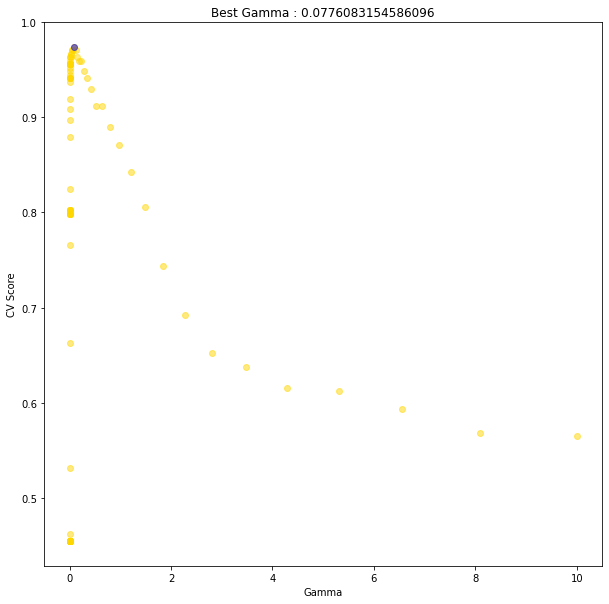

In [15]:
from sklearn.model_selection import cross_val_score

fig, ax = plt.subplots(1, figsize = (10,10))

best_score = 0

for gamma_value in np.logspace(-9, 1, 110):
    # Instance of an SVC model for each iteration of gamma
    SVC_Model = SVC(gamma = gamma_value)
    # Calcualte the Cross Validation score 
    cv_score = cross_val_score(SVC_Model, X_train, y_train, cv = 10).mean()
    # Plot each data point
    ax.scatter(gamma_value, cv_score, color = "gold", alpha = 0.5)
    # Update best_gamma with the value of gamma that produces the highest CV score
    if cv_score > best_score:
        best_gamma = gamma_value 
        best_score = cv_score

# Visualize the best score 
ax.scatter(best_gamma, best_score, color = "blue", alpha = 0.5)
        
l = ax.set(title = "Best Gamma : " + str(best_gamma), 
           xlabel = "Gamma",
           ylabel = "CV Score")

With the best_gamma value found, test the testing data to evaluate the model's accuracy.

In [16]:
# Test the data with the best gamma value
SVC_Model = SVC(gamma = best_gamma)
SVC_Model.fit(X_train, y_train)
SVC_Model.score(X_train, y_train), SVC_Model.score(X_test, y_test)

(0.978021978021978, 0.9130434782608695)

Using a cross validation test we have found an optimal value for gamma which gives a score of 0.956, an excpetional score on the test data, higher than values we observed before.

### V. Inspecting Data

Now that we have arrived at the optimal gamma value, we will evaluate instances of our trained model that gave the wrong answer on our test set. We do this with a *confusion matrix*, which is a matrix visual of the models predictions against the truth. We start by extracting our model predictions on the test data set.  

In [17]:
# Fit the test data to the model
SVC_Model.fit(X_test, y_test)
# Extract predictions from test data and save to a variable
y_test_pred = SVC_Model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix on test data and display matrix
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 27]])

As seen above, there are two instances where the model incorrectly predicts the species of a penguin as indicated by the ones in the matrix. We examine these instances to try to understand where the model was 'tricked' or 'confused'. In order to do this we first subset names of the species of the test data for which the species differs in the model prediction. Next we subest the model predictions under the same condition to find what the mistaken predictions were. We compare the two results to evaluate the mistakes.

In [19]:
# Species name of the actual test data set
mistake_labels = y_test[y_test != y_test_pred]
# Speices name of the mistaken prediction
mistake_preds = y_test_pred[y_test != y_test_pred]
mistake_preds, mistake_labels

(array(['Chinstrap', 'Adelie'], dtype=object),
 111       Adelie
 182    Chinstrap
 Name: Species, dtype: object)

The model incorrectly predicts Adelie for a Chinstrap penguin and Chinstrap for an Adelie penguin. A quick summary table will give an idea of the summary statistics for each species and will provide insight into where the model may have been confused.

In [20]:
# Create a summary table
penguins.groupby("Species").aggregate([np.mean, np.std])

Culmen Length (mm)           Flipper Length (mm)          
                        mean       std                mean       std
Species                                                             
Adelie             38.791391  2.663405          189.953642  6.539457
Chinstrap          48.833824  3.339256          195.823529  7.131894
Gentoo             47.504878  3.081857          217.186992  6.484976

In [21]:
# First instance of an incorrect prediction vs actual test data
mistake_preds[0], penguins.loc[182]

('Chinstrap',
 Species                Chinstrap
 Sex                            F
 Culmen Length (mm)          40.9
 Flipper Length (mm)          187
 Name: 182, dtype: object)

Here a female Chinstrap is incorecctly predicted as an Adelie. It appears that a Chinstrap penguin has an unusually short culmen length and flipper length that is in the range for Adelie penguins. This may be a small Chinstrap penguin that the model predicted as an Adelie.

In [22]:
# Second instance of an incorrect prediction vs actual test data
mistake_preds[1], penguins.loc[111]

('Adelie',
 Species                Adelie
 Sex                         M
 Culmen Length (mm)       45.6
 Flipper Length (mm)       191
 Name: 111, dtype: object)

Here a male Adelie is incorrectly predicted as a Chinstrap, the opposite of the previous example. It appears that an Adelie has an unusually long culmen length and flipper length that is in the range for Chinstrap penguins. This may be a large Adelie penguin that the model predicted as a Chinstrap.

### VI. Plotting data

Having examined the mistakes of the model, a plot of the decision region of the SVC model will help visualize the model's behavior as well as identify the mistakes. To acheive this we first encode the `Species` column on the test data with numerical values. A copy is made so that encoded values are being written on to a new dataframe rather than on 'test' itself which is a splice of the penguins dataframe.

In [24]:
# Create a copy of the test data
test_copy = test.copy()
le = preprocessing.LabelEncoder()
test_copy['Species'] = le.fit_transform(test_copy['Species'])

A function to plot the decision regions from the classifier is defined. This function will fit the test data to the model, and then plot the classified regions by the sex of the penguins.

In [29]:
def plot_regions(c, df, sex):
    """
    Plots the decision regions from a classifer 
    underneath the data in X and y. 
    c: a classifier
    df: a dataframe (test data)
    sex: sex of penguin
    """
    # Decision region is plotted based on quantitative features of the model
    # Subset the dataframe by quantitative features 
    # Subset target variable
    X = df[['Culmen Length (mm)', 'Flipper Length (mm)']]
    y = df['Species']
    
    # fit the model to the entire test data using X, y
    c.fit(X, y)
    
    # Subset data by sex
    # Predictor variables of the test set subsetted for indicated sex
    X_sex = test_copy[test_copy["Sex"] == sex][['Culmen Length (mm)', 'Flipper Length (mm)']]
    # Target variables of the test set subsetted for indicated sex
    y_sex = test_copy[test_copy["Sex"] == sex]['Species']


    # give names to the two columns of the subsetted data
    x0 = X_sex['Culmen Length (mm)']
    x1 = X_sex['Flipper Length (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the np.c_ attribute to join together the two parts of the grid. 
    # array.ravel() converts a multidimensional array into a 1d array, and we use array.reshape() to turn the resulting predictions p back into 2d
    p = c.predict(np.c_[xx.ravel(), yy.ravel()])
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1, figsize = (10,10))
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    # plot the data
    ax.scatter(x0, x1, c = y_sex, cmap = "jet")
    
    ax.set(xlabel = "Culmen Length (mm)",
           ylabel = "Flipper Length (mm)")
    
    # Set conditions for the plot titles
    if sex == "M":
        ax.set(title = "Male")
    else:
        ax.set(title = "Female")
        

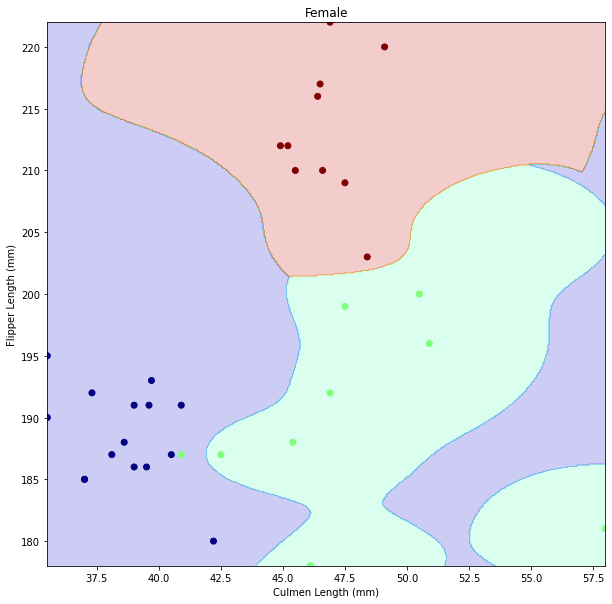

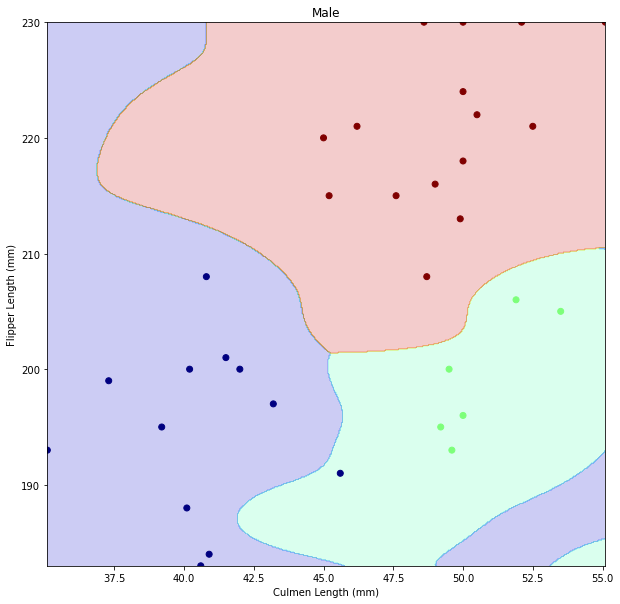

In [30]:
# Plot the decision regions for the SVC model using best gamma
k = plot_regions(SVC_Model, test_copy, sex = 'F'), plot_regions(SVC_Model, test_copy, sex = 'M')

The first plot is a plot of the decision regions for female penguins and the second plot is a plot of the decision regions for male penguins. As we can see, there are two 'mistakes' in the decision regions as indicated by the points in a region with a different color. These points are precisely the mistakes we evaluated above which were a female Chinstrap predicted as an Adelie and a male Adelie predicted as a Chinstrap.